In [1]:
import git
import sys

repo = git.Repo("./", search_parent_directories=True)
homedir = repo.working_dir
 
# setting path
sys.path.append(homedir)

%load_ext autoreload
%autoreload 2
from utils import *
import os
import numpy as np
import pandas as pd
import pickle
import traceback
from utils import videometa

homedir

'C:\\Users\\amanda\\Documents\\GitHub\\cs231n'

### Load and preprocess 2D data

In [2]:
num_joints = 17

In [3]:
# preprocess a single video
processed_npz_path="{}/pretrained_models/poseformer/1ovgasC1/input_2D/".format(homedir)
res2d = np.load("{}/keypoints.npz".format(processed_npz_path))['reconstruction']
res2d.shape

(1, 325, 17, 2)

In [4]:
res2d = np.reshape(res2d, (res2d.shape[1], res2d.shape[2], res2d.shape[3]))
print(res2d[0])

[[171.34386  256.31653 ]
 [158.9295   260.97192 ]
 [196.17256  307.52573 ]
 [177.55103  350.97598 ]
 [183.75821  251.66115 ]
 [236.5192   285.80063 ]
 [211.69049  329.25085 ]
 [161.77441  213.6422  ]
 [169.27478  163.72615 ]
 [176.38718  140.70789 ]
 [171.34386  111.999695]
 [186.86179  164.76068 ]
 [221.00127  186.48581 ]
 [196.17256  189.58939 ]
 [140.30797  177.17503 ]
 [177.55103  208.21092 ]
 [202.37973  183.38222 ]]


In [5]:
# reshape data into format (# frames, num_joints * 3) where for each joint, the 3 values are (x, y, conf) 
# we'll default to 1 for confidence since these values aren't needed to calculate joint positions
reshaped_res_2d = np.ones((res2d.shape[0], num_joints * 3))
mask_x = [i for i in range(0, num_joints*3, 3)]
mask_y = [i+1 for i in range(0, num_joints*3, 3)]
reshaped_res_2d[:,mask_x] = res2d[:,:,0]
reshaped_res_2d[:,mask_y] = res2d[:,:,1]
reshaped_res_2d

array([[171.34385681, 256.31652832,   1.        , ..., 202.37973022,
        183.38221741,   1.        ],
       [169.83135986, 256.83422852,   1.        , ..., 202.10549927,
        183.06477356,   1.        ],
       [170.2118988 , 256.5680542 ,   1.        , ..., 199.43978882,
        182.72915649,   1.        ],
       ...,
       [174.77770996, 269.71792603,   1.        , ..., 227.77799988,
        201.57470703,   1.        ],
       [174.68728638, 269.54486084,   1.        , ..., 227.22172546,
        202.00056458,   1.        ],
       [174.2666626 , 267.08917236,   1.        , ..., 220.52268982,
        201.43547058,   1.        ]])

### Get Metrics for 2D data

R
[ 78 150 210 270]
[ 46 112 178 242 299]
[ 19  78 150 210 270 322]
[ 46 112 178 242 299]


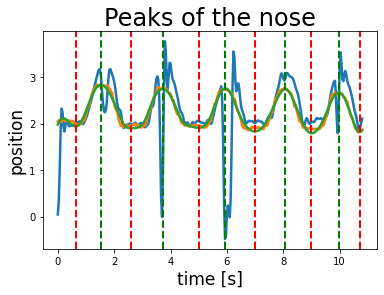

2.8941406574675974


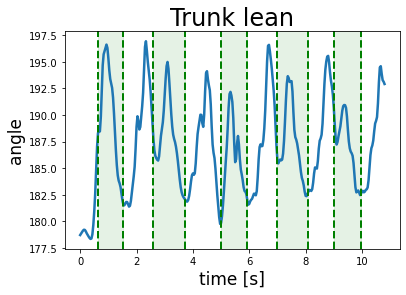

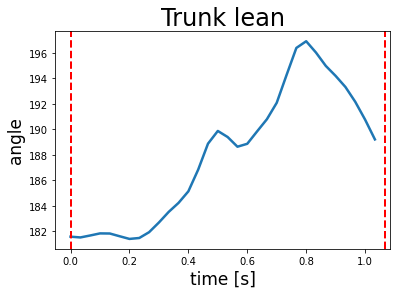

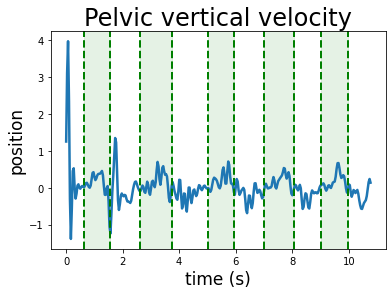

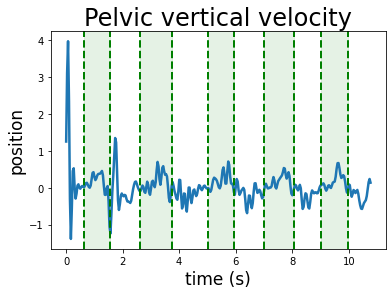

{'subjectid': '1ovgasC1',
 'orientation': 'R',
 'framerate': 30,
 'n': 5,
 'time': 10.100000000000001,
 'time_diff': -0.05833333333333329,
 'speed': 0.5,
 'time_sd': 0.2145796925257477,
 'speed_sd': 0.05085778282118982,
 'n_sit2stand': 5,
 'time_sit2stand': 5.0,
 'time_diff_sit2stand': -0.05833333333333332,
 'speed_sit2stand': 1.0,
 'time_sd_sit2stand': 0.08692269873603531,
 'speed_sd_sit2stand': 0.08498458937489113,
 'n_stand2sit': 4,
 'time_stand2sit': 4.333333333333333,
 'time_diff_stand2sit': 0.07499999999999998,
 'speed_stand2sit': 0.92,
 'time_sd_stand2sit': 0.11902380714238081,
 'speed_sd_stand2sit': 0.09974839072898194,
 'left_knee_range_mean': 90.15109598211663,
 'left_knee_sd': 33.12939509919248,
 'left_knee_max': 179.00209344074494,
 'left_knee_min': 87.12638589633326,
 'left_knee_max_mean': 176.91958130794768,
 'left_knee_min_mean': 87.6731742590674,
 'left_knee_max_sd': 1.440096136809269,
 'left_knee_min_sd': 0.30906418637226596,
 'left_knee_ang_vel': -7.597155550055675,
 

In [6]:
# process a single video
process_subject_poseformer("1ovgasC1", reshaped_res_2d, res3d=None, framerate=30, show_plots=True)

### Run on all videos for 2D data

In [7]:
# Get a list of all subjects
subjects = os.listdir("{}/pretrained_models/poseformer/".format(homedir))
subjects

['1ovgasC1',
 '1ovgasC1_copy',
 '20230422_120659',
 'AnEq8Uph',
 'kunkun',
 'OuYG4U64',
 'README.md',
 'video']

1ovgasC1
R
[ 78 150 210 270]
[ 46 112 178 242 299]
[ 19  78 150 210 270 322]
[ 46 112 178 242 299]


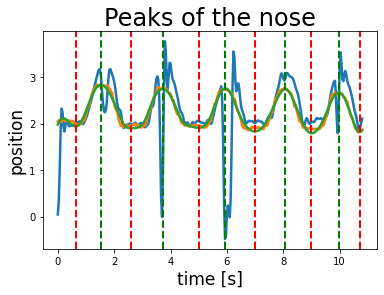

2.8941406574675974


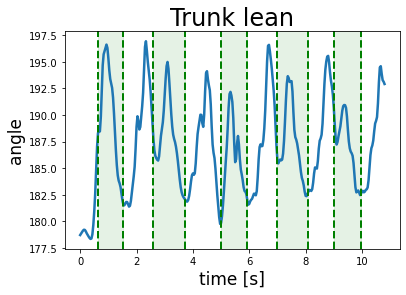

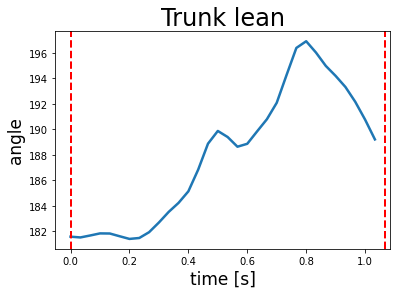

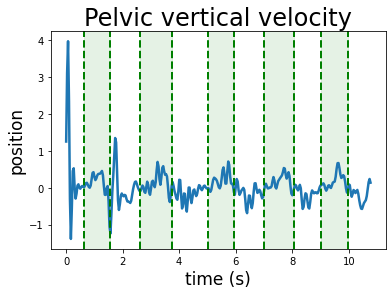

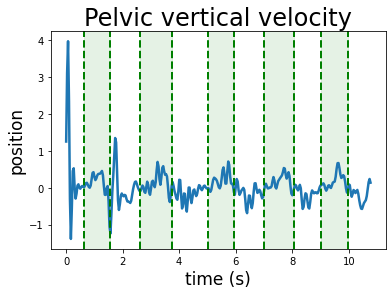

1ovgasC1_copy
Skipped 1ovgasC1_copy
20230422_120659
R
[169 274 404 528]
[ 99 202 303 441]
[ 67 169 274 404 528]
[ 99 202 303 441]


Traceback (most recent call last):
  File "<ipython-input-8-9b2619a80048>", line 10, in <module>
    res = np.load("{}/keypoints.npz".format(processed_npz_path))['reconstruction']
  File "C:\Users\amanda\anaconda3\lib\site-packages\numpy\lib\npyio.py", line 416, in load
    fid = stack.enter_context(open(os_fspath(file), "rb"))
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amanda\\Documents\\GitHub\\cs231n/pretrained_models/poseformer/1ovgasC1_copy/input_2D//keypoints.npz'


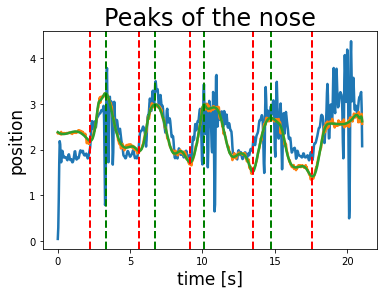

2.9580400154762163


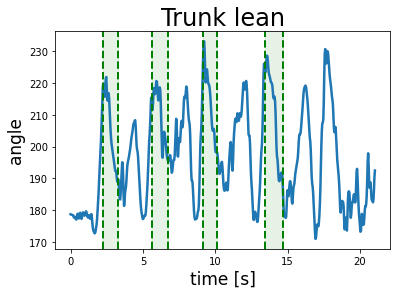

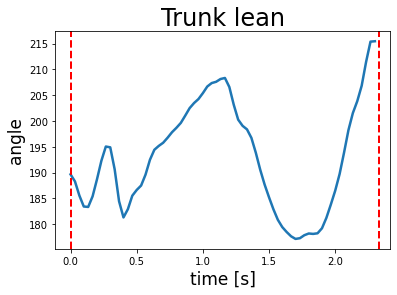

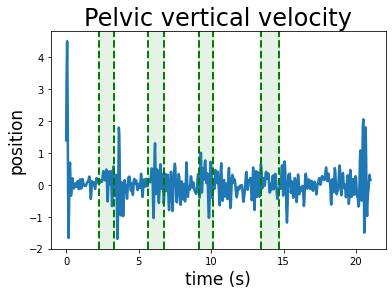

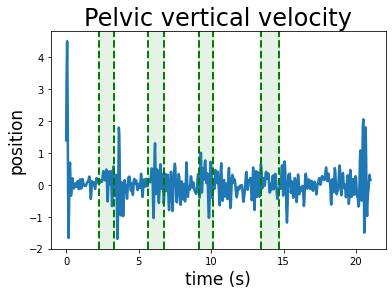

AnEq8Uph
R
[ 57 135 200 279]
[ 31  96 169 248 323]
ERROR, to mane dips
[  4  57 135 239 279 353]
[ 31  96 169 248 323]


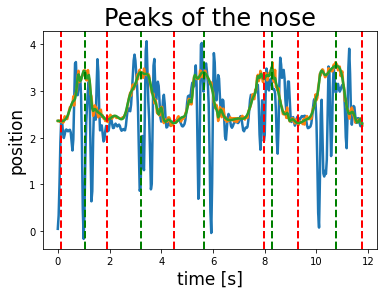

3.3592336215744094


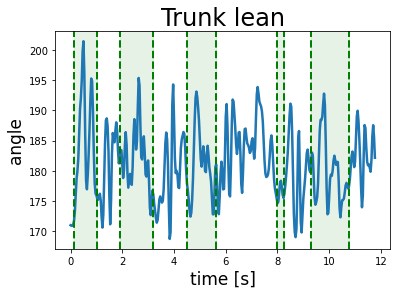

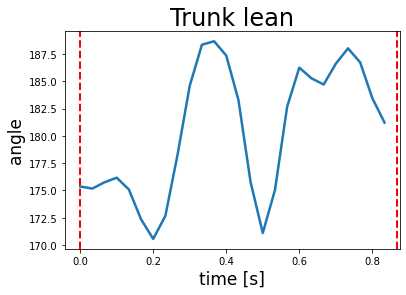

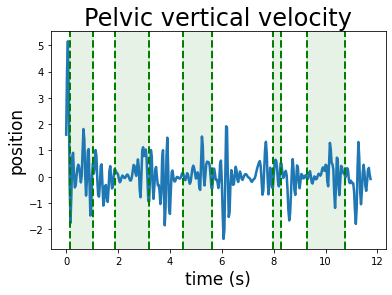

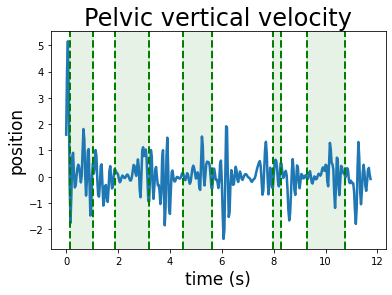

kunkun
OuYG4U64
R
[ 72  76 144 193 272]
[ 39  74 107 159 234 289]
ERROR, to mane dips
ERROR, to mane dips
[ 72  76 144 231 272]
[ 39  74 107 159 234 289]


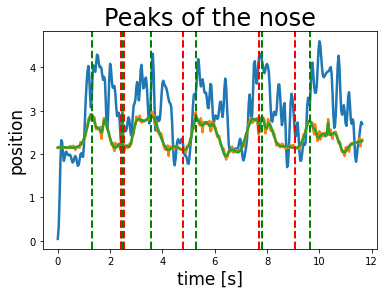

3.1318498383596736
Skipped OuYG4U64
README.md
video
Skipped video
['1ovgasC1_copy', 'OuYG4U64', 'video']


C:\Users\amanda\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amanda\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "<ipython-input-8-9b2619a80048>", line 19, in <module>
    results = process_subject_poseformer(subjectid, reshaped_res, res3d=None, framerate=30, show_plots=True)
  File "C:\Users\amanda\Documents\GitHub\cs231n\utils.py", line 1166, in process_subject_poseformer
    results.update(get_angles_results(res, allbreaks, framerate = framerate, alternate=1, num_joints=17, show_plots = show_plots))
  File "C:\Users\amanda\Documents\GitHub\cs231n\utils.py", line 484, in get_angles_results
    results.update(get_angle_stats(LANK, LKNE, LHIP, res, breaks, name="left_knee", framerate = framerate, alternate = alternate, show_plot

In [8]:
skipped = []
all_res = []

# Convert frames to a numpy array
for subjectid in subjects:
    print(subjectid)
    try:
        if (subjectid != "kunkun" and os.path.isdir("{}/pretrained_models/poseformer/{}".format(homedir, subjectid))):
            processed_npz_path="{}/pretrained_models/poseformer/{}/input_2D/".format(homedir, subjectid)
            res = np.load("{}/keypoints.npz".format(processed_npz_path))['reconstruction']
            res = np.reshape(res, (res.shape[1], res.shape[2], res.shape[3]))
            
            reshaped_res = np.ones((res.shape[0], num_joints * 3))
            mask_x = [i for i in range(0, num_joints*3, 3)]
            mask_y = [i+1 for i in range(0, num_joints*3, 3)]
            reshaped_res[:,mask_x] = res[:,:,0]
            reshaped_res[:,mask_y] = res[:,:,1]

            results = process_subject_poseformer(subjectid, reshaped_res, res3d=None, framerate=30, show_plots=True)
            all_res.append(results) 
    except Exception as e:
        traceback.print_exc()
        skipped.append(subjectid)
        print("Skipped " + subjectid)
        continue
    
print(skipped)

In [9]:
# Print results
res_df = pd.DataFrame(all_res)
res_df

,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,n_sit2stand,...,neck_max_y_acc_stand2sit,ank_to_hip_dist_sit,ank_to_hip_dist_stand,knee_to_hip_dist_sit,knee_to_hip_dist_stand,height,lknee_angle_first_sit,rknee_angle_first_sit,lknee_angle_first_stand,rknee_angle_first_stand
0,1ovgasC1,R,30,5,10.100000,-0.058333,0.50,0.214580,0.050858,5,...,12.276474,1.232404,1.231018,1.405291,1.033118,0.942056,96.352819,116.355802,173.014969,174.873756
1,20230422_120659,R,30,4,15.366667,0.244444,0.26,0.399566,0.027234,4,...,15.823833,1.313254,1.930136,1.097862,2.187951,0.959074,111.632622,116.484275,139.548026,175.403290
2,AnEq8Uph,R,30,5,11.633333,0.175000,0.43,0.734060,0.162263,5,...,28.001892,2.099668,0.748476,2.890559,1.712049,0.958090,135.882853,118.131369,207.351161,164.422457


In [10]:
# save results
res_df.to_csv("{}/results/results-poseformer-20230604.csv".format(homedir))

### Load and preprocess 3D data

In [11]:
# preprocess a single video
processed_npy_path="{}/pretrained_models/poseformer/1ovgasC1/".format(homedir)
res3d = np.load("{}/3d_output.npy".format(processed_npy_path))
res3d.shape

(325, 17, 3)

In [12]:
res3d[0]

array([[ 0.00000000e+00,  0.00000000e+00,  5.64724684e-01],
       [ 1.06827892e-01,  7.29979798e-02,  5.59179604e-01],
       [ 2.21066400e-02,  3.81901205e-01,  3.30851376e-01],
       [ 4.76032495e-02,  2.17267364e-01,  0.00000000e+00],
       [-1.10257074e-01, -7.21952021e-02,  5.70189476e-01],
       [-2.83986151e-01,  2.56850958e-01,  3.98777127e-01],
       [-2.35922799e-01,  6.88035786e-02,  4.96431589e-02],
       [ 7.07202107e-02,  4.54398692e-02,  8.25423360e-01],
       [ 6.37624711e-02,  5.24488688e-02,  1.06909049e+00],
       [ 4.28251810e-02,  1.29261613e-01,  1.18680525e+00],
       [ 4.30522263e-02,  1.02076054e-01,  1.31477118e+00],
       [-8.73580873e-02,  1.01935863e-03,  1.04240990e+00],
       [-2.37000406e-01,  2.43679702e-01,  9.48955834e-01],
       [ 1.45926178e-02,  3.85307074e-01,  9.46800590e-01],
       [ 2.23747402e-01,  1.19591296e-01,  1.00494158e+00],
       [ 1.43164620e-01,  3.79561603e-01,  8.43690932e-01],
       [ 1.26386732e-02,  4.14372772e-01

In [13]:
# reshape data into format (# frames, num_joints * 4) where for each joint, the 3 values are (x, y, z, conf) 
# we'll default to 1 for confidence since these values aren't needed to calculate joint positions
# reshaped_res_3d = np.ones((res3d.shape[0], num_joints * 4))
# mask_x = [i for i in range(0, num_joints*4, 4)]
# mask_y = [i+1 for i in range(0, num_joints*4, 4)]
# mask_z = [i+2 for i in range(0, num_joints*4, 4)]
# reshaped_res_3d[:,mask_x] = res3d[:,:,0]
# reshaped_res_3d[:,mask_y] = res3d[:,:,1]
# reshaped_res_3d[:,mask_z] = res3d[:,:,2]
# reshaped_res_3d

array([[0.        , 0.        , 0.56472468, ..., 0.41437277, 0.98851281,
        1.        ],
       [0.        , 0.        , 0.557935  , ..., 0.40528113, 0.97800148,
        1.        ],
       [0.        , 0.        , 0.55552465, ..., 0.40115544, 0.98062706,
        1.        ],
       ...,
       [0.        , 0.        , 0.58216643, ..., 0.49705088, 1.00810266,
        1.        ],
       [0.        , 0.        , 0.57824111, ..., 0.48303163, 1.0010891 ,
        1.        ],
       [0.        , 0.        , 0.58329278, ..., 0.49462667, 0.99917799,
        1.        ]])

R
[ 46 112 178 242 299]
[ 19  78 150 210 270]
[  6  46 112 178 242 299]
[ 19  78 150 210 270]


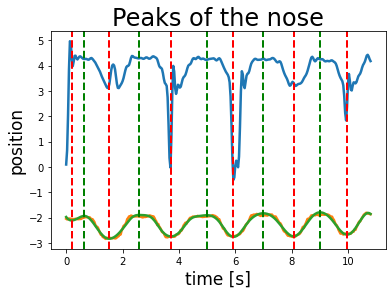

2.90520283149852


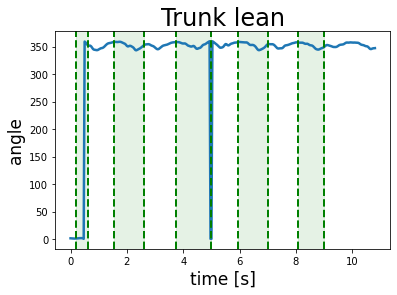

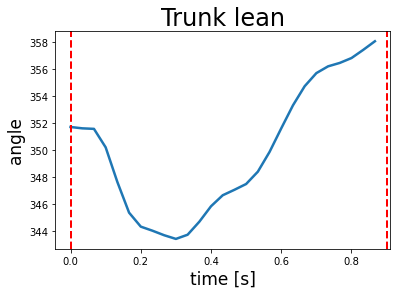

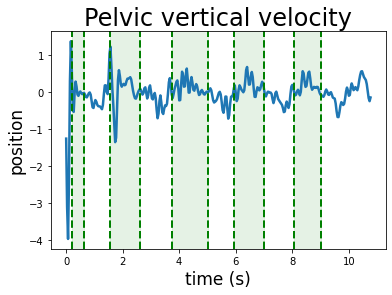

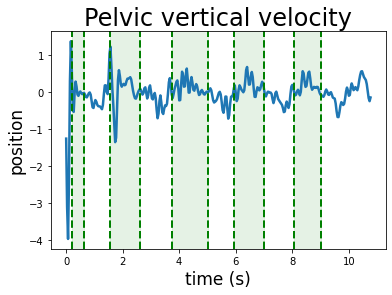

E


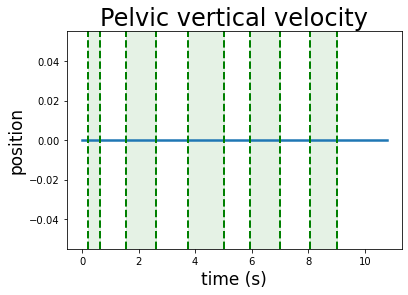

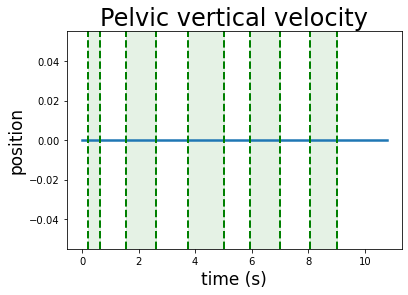

{'subjectid': '1ovgasC1',
 'orientation': 'R',
 'framerate': 30,
 'n': 5,
 'time': 9.766666666666667,
 'time_diff': 0.14166666666666666,
 'speed': 0.51,
 'time_sd': 0.3290390047800818,
 'speed_sd': 0.11273726725277226,
 'n_sit2stand': 5,
 'time_sit2stand': 4.766666666666667,
 'time_diff_sit2stand': 0.07499999999999998,
 'speed_sit2stand': 1.05,
 'time_sd_sit2stand': 0.28095076674273967,
 'speed_sd_sit2stand': 0.556682516256955,
 'n_stand2sit': 4,
 'time_stand2sit': 4.033333333333333,
 'time_diff_stand2sit': 0.05000000000000002,
 'speed_stand2sit': 0.99,
 'time_sd_stand2sit': 0.09537935951882995,
 'speed_sd_stand2sit': 0.09379947909828369,
 'left_knee_range_mean': 88.90278852631556,
 'left_knee_sd': 31.87421047213371,
 'left_knee_max': 274.69710518709167,
 'left_knee_min': 182.20989287348374,
 'left_knee_max_mean': 272.4587124037547,
 'left_knee_min_mean': 185.21574351708472,
 'left_knee_max_sd': 1.1731236420617894,
 'left_knee_min_sd': 3.3327026761847702,
 'left_knee_ang_vel': -8.55539

In [15]:
# process a single video
# process_subject_poseformer("1ovgasC1", reshaped_res_2d, reshaped_res_3d, framerate=30, show_plots=True)
process_subject_poseformer("1ovgasC1", reshaped_res_2d, res3d, framerate=30, show_plots=True)

### Run on all videos for 2D and 3D data

1ovgasC1
R
[ 78 150 210 270]
[ 46 112 178 242 299]
[ 19  78 150 210 270 322]
[ 46 112 178 242 299]


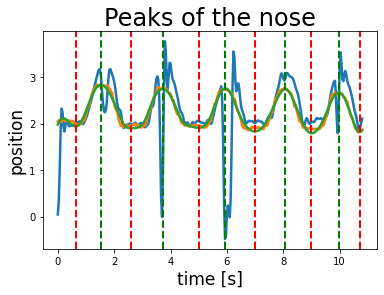

2.8941406574675974


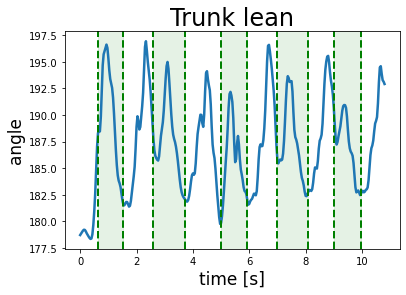

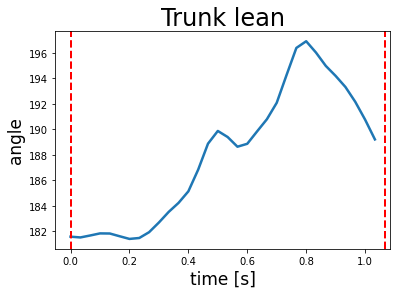

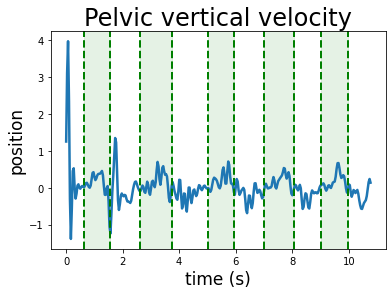

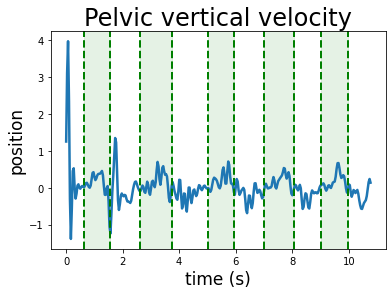

E


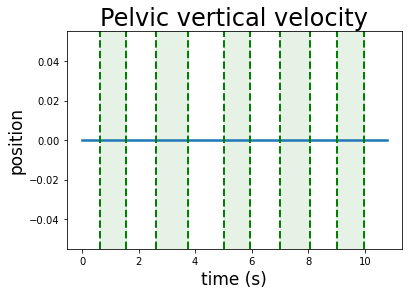

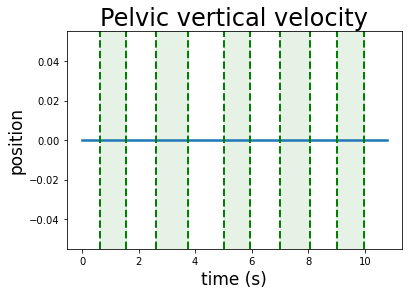

1ovgasC1_copy
Skipped 1ovgasC1_copy
20230422_120659
R
[169 274 404 528]
[ 99 202 303 441]
[ 67 169 274 404 528]
[ 99 202 303 441]


Traceback (most recent call last):
  File "<ipython-input-16-cdb63e886e98>", line 10, in <module>
    res2d = np.load("{}/keypoints.npz".format(processed_npz_path_2d))['reconstruction']
  File "C:\Users\amanda\anaconda3\lib\site-packages\numpy\lib\npyio.py", line 416, in load
    fid = stack.enter_context(open(os_fspath(file), "rb"))
FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\amanda\\Documents\\GitHub\\cs231n/pretrained_models/poseformer/1ovgasC1_copy/input_2D//keypoints.npz'


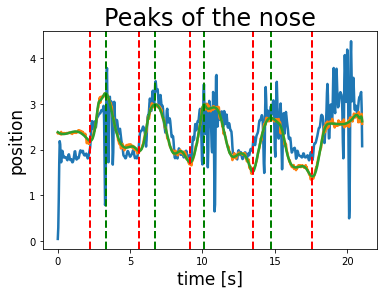

2.9580400154762163


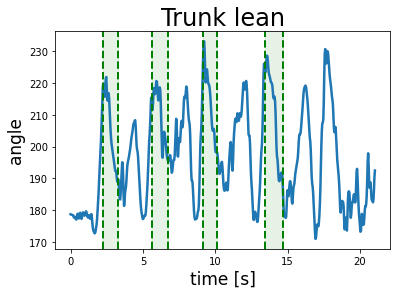

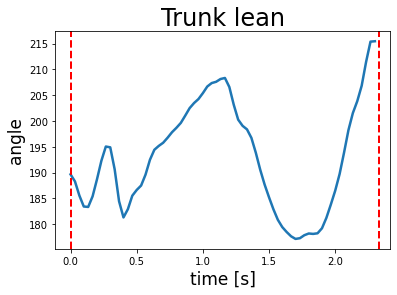

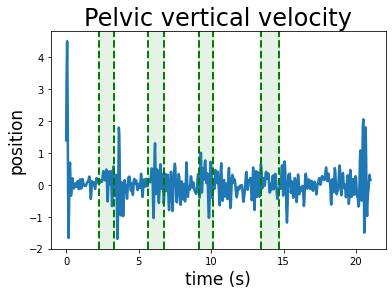

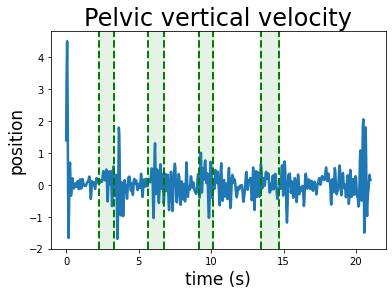

E


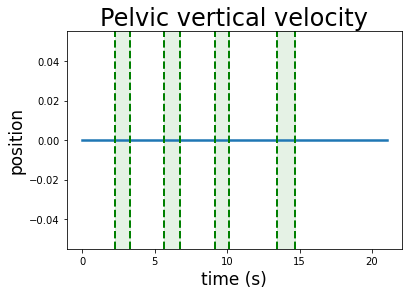

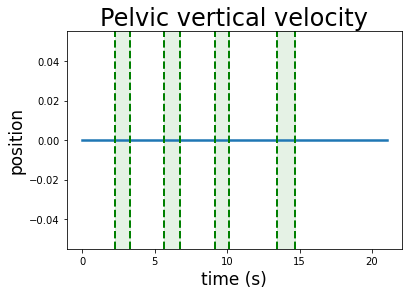

AnEq8Uph
R
[ 57 135 200 279]
[ 31  96 169 248 323]
ERROR, to mane dips
[  4  57 135 239 279 353]
[ 31  96 169 248 323]


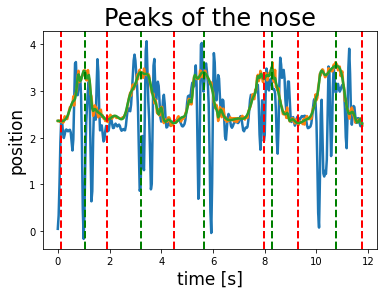

3.3592336215744094


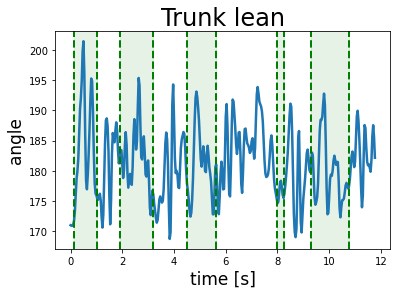

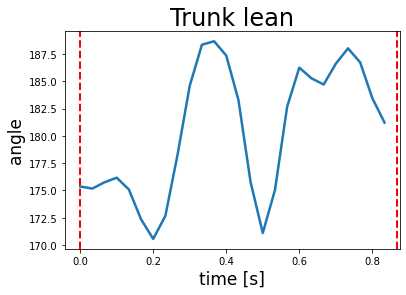

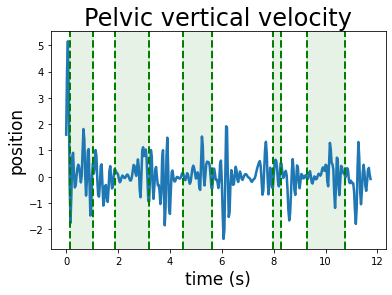

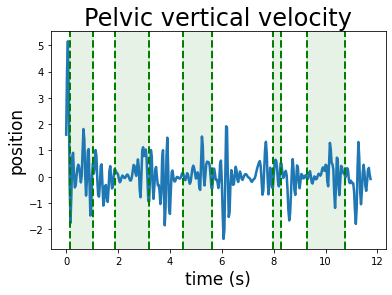

E


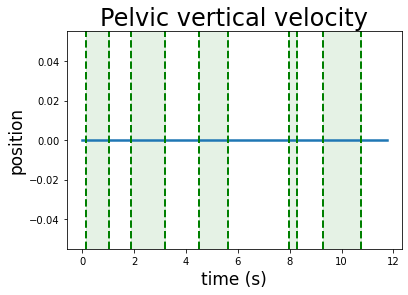

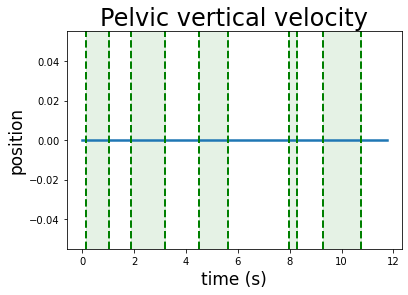

kunkun
OuYG4U64
R
[ 72  76 144 193 272]
[ 39  74 107 159 234 289]
ERROR, to mane dips
ERROR, to mane dips
[ 72  76 144 231 272]
[ 39  74 107 159 234 289]


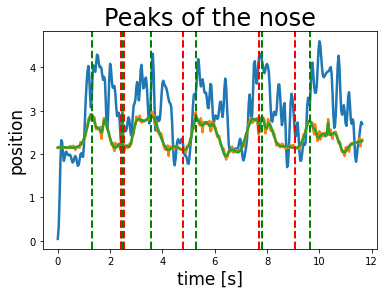

3.1318498383596736
Skipped OuYG4U64
README.md
video
Skipped video
['1ovgasC1_copy', 'OuYG4U64', 'video']


C:\Users\amanda\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\amanda\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
Traceback (most recent call last):
  File "<ipython-input-16-cdb63e886e98>", line 22, in <module>
    results = process_subject_poseformer(subjectid, reshaped_res_2d, res3d, framerate=30, show_plots=True)
  File "C:\Users\amanda\Documents\GitHub\cs231n\utils.py", line 1166, in process_subject_poseformer
    results.update(get_angles_results(res, allbreaks, framerate = framerate, alternate=1, num_joints=17, show_plots = show_plots))
  File "C:\Users\amanda\Documents\GitHub\cs231n\utils.py", line 484, in get_angles_results
    results.update(get_angle_stats(LANK, LKNE, LHIP, res, breaks, name="left_knee", framerate = framerate, alternate = alternate, show_plots

In [16]:
skipped = []
all_res = []

# Convert frames to a numpy array
for subjectid in subjects:
    print(subjectid)
    try:
        if (subjectid != "kunkun" and os.path.isdir("{}/pretrained_models/poseformer/{}".format(homedir, subjectid))):
            processed_npz_path_2d="{}/pretrained_models/poseformer/{}/input_2D/".format(homedir, subjectid)
            res2d = np.load("{}/keypoints.npz".format(processed_npz_path_2d))['reconstruction']
            res2d = np.reshape(res2d, (res2d.shape[1], res2d.shape[2], res2d.shape[3]))
            
            reshaped_res_2d = np.ones((res2d.shape[0], num_joints * 3))
            mask_x = [i for i in range(0, num_joints*3, 3)]
            mask_y = [i+1 for i in range(0, num_joints*3, 3)]
            reshaped_res_2d[:,mask_x] = res2d[:,:,0]
            reshaped_res_2d[:,mask_y] = res2d[:,:,1]
            
            processed_npy_path_3d="{}/pretrained_models/poseformer/{}/".format(homedir, subjectid)
            res3d = np.load("{}/3d_output.npy".format(processed_npy_path_3d))

            results = process_subject_poseformer(subjectid, reshaped_res_2d, res3d, framerate=30, show_plots=True)
            all_res.append(results) 
    except Exception as e:
        traceback.print_exc()
        skipped.append(subjectid)
        print("Skipped " + subjectid)
        continue
    
print(skipped)

In [17]:
# Print results
res_df = pd.DataFrame(all_res)
res_df

,subjectid,orientation,framerate,n,time,time_diff,speed,time_sd,speed_sd,n_sit2stand,...,neck_3d_max_y_acc_stand2sit,ank_to_hip_dist_sit_3d,ank_to_hip_dist_stand_3d,knee_to_hip_dist_sit_3d,knee_to_hip_dist_stand_3d,height_3d,lknee_angle_first_sit_3d,rknee_angle_first_sit_3d,lknee_angle_first_stand_3d,rknee_angle_first_stand_3d
0,1ovgasC1,R,30,5,10.100000,-0.058333,0.50,0.214580,0.050858,5,...,3.529370,1.184692,1.137031,1.274973,1.009536,1.625580,81.497101,89.187584,173.174149,170.130646
1,20230422_120659,R,30,4,15.366667,0.244444,0.26,0.399566,0.027234,4,...,10.009797,1.030876,1.027364,1.114463,0.895899,1.580815,244.149033,232.123657,158.325043,207.963181
2,AnEq8Uph,R,30,5,11.633333,0.175000,0.43,0.734060,0.162263,5,...,19.431335,0.835438,0.411454,1.081322,0.742316,1.583579,259.614563,261.986328,206.224548,165.361404
